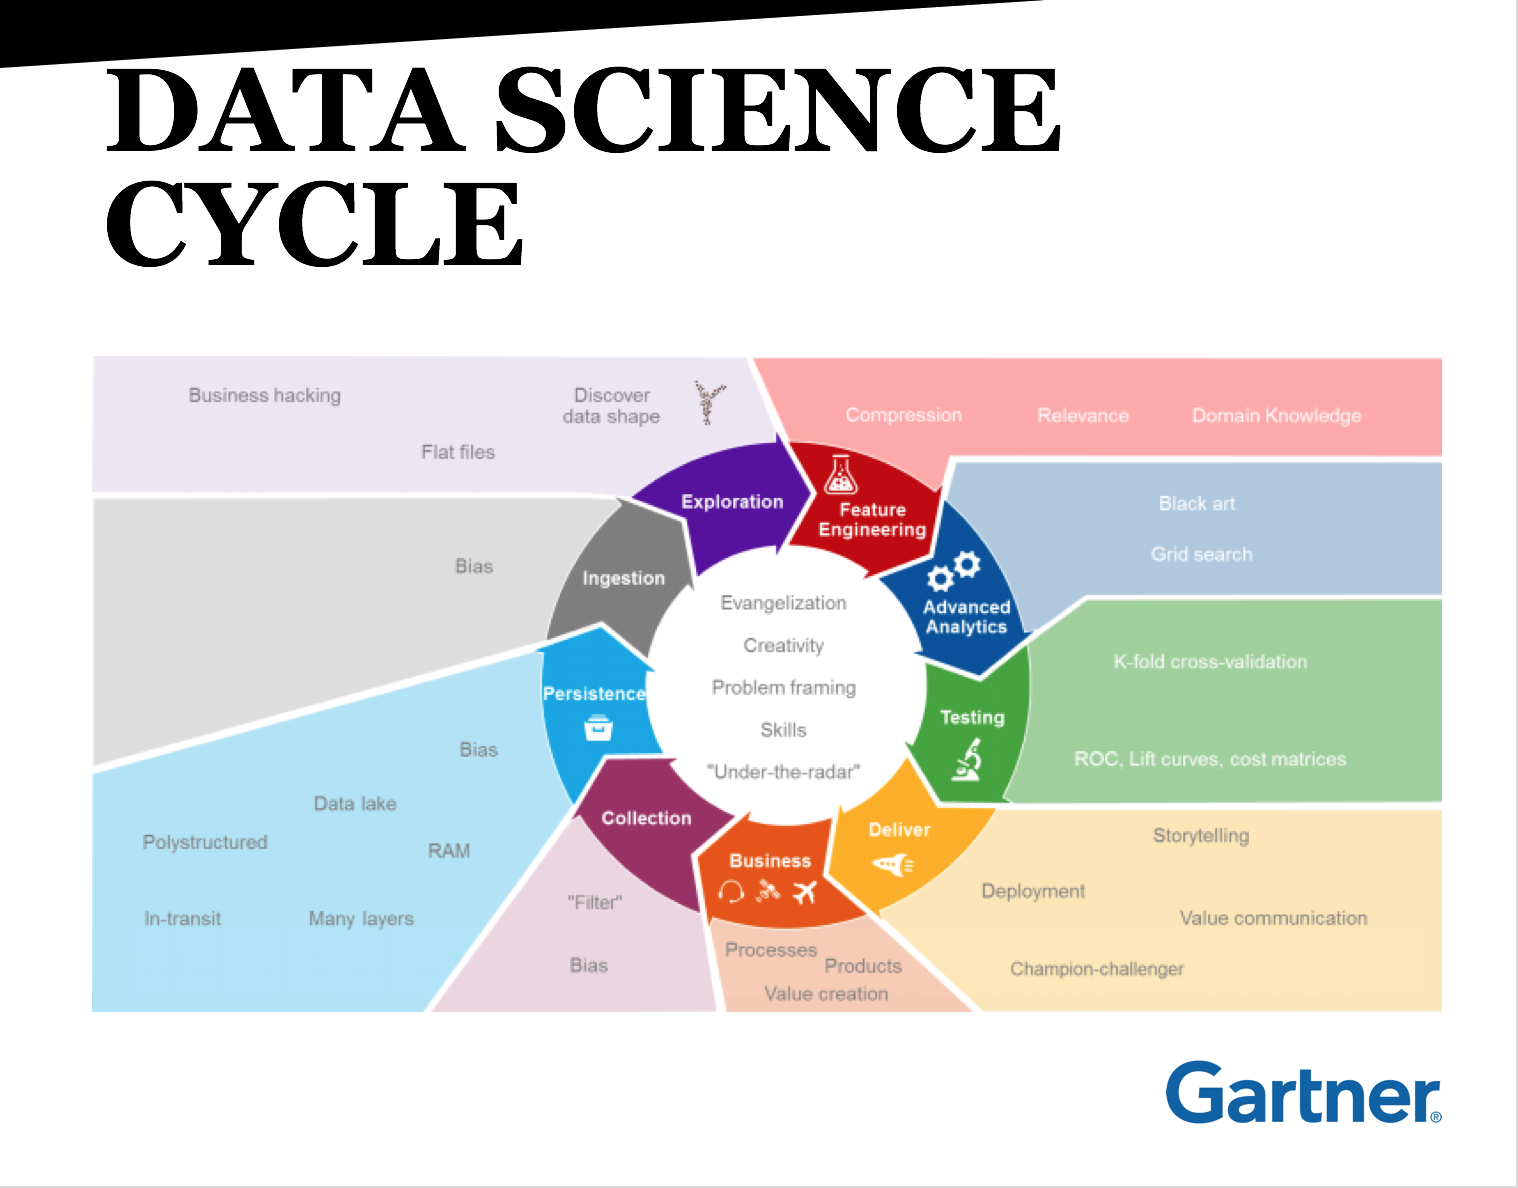

In [7]:
from IPython.display import Image
Image("cycle.png")


# Oppdage Kundesegmenter

Datasettet kommer fra [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Vi kommer til å droppe `'Channel'` og `'Region'`, for å fokusere på gjenværende 6 variabler.



In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [9]:
# Display a description of the dataset
data.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


In [10]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Feature Relevance


### Feature relevance


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

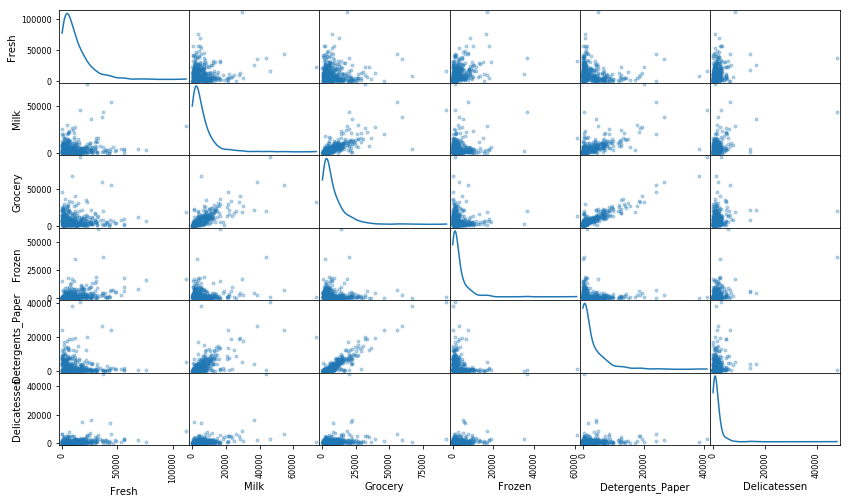

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Feature correlation
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
The data is not normally distributed, the feature distributions appear to be skewed right (positive), or lognormal, with a mean greater than the median. To get an understanding of the correlation between the features the heatmap below is visualised.

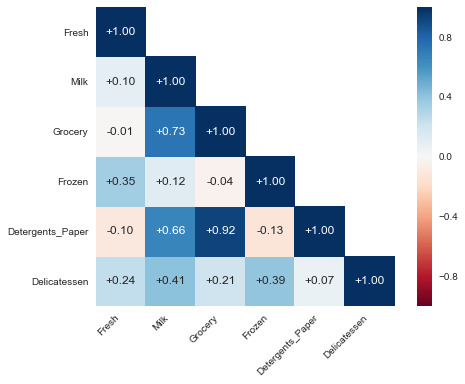

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

Here we see that the fresh feature does not correlate that much with the other features, indicating its importance. Considering that the correlation for the fresh features is lowest compared to the other feature correaltions, it may be the most important feaure. While the detergent_paper and milk features looks to be more correlating with the other features, being more reduntant.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

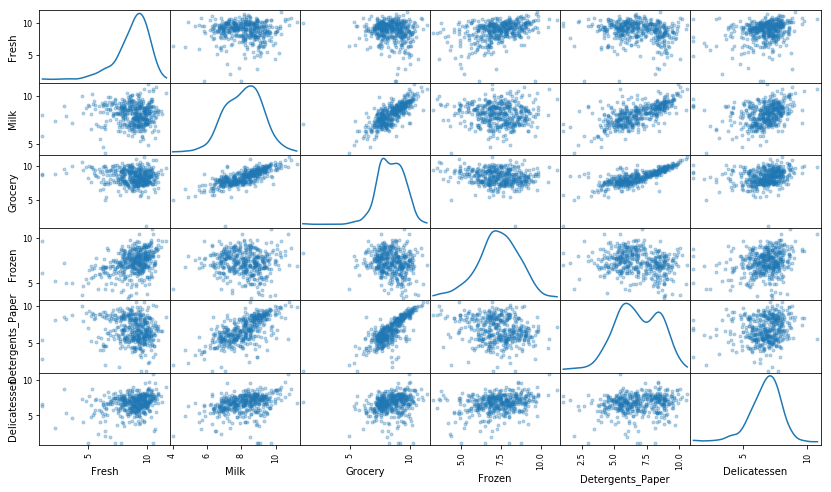

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');



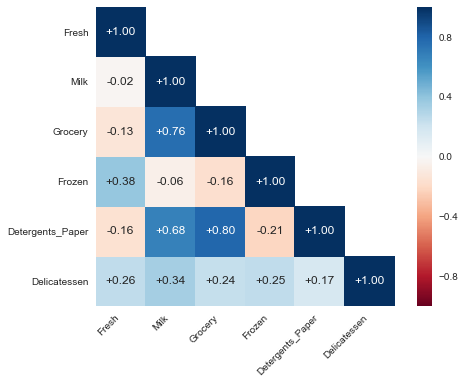

In [9]:

corr = log_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).



### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [7]:
outlier_count=[]
outliers_index=[]
from collections import Counter
c = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_count.append((feature,len(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])))
    outliers_index.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    c.update(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)




# OPTIONAL: Select the indices for data points you wish to remove
#print ("outlier index", outliers)
import itertools
outliers = list(itertools.chain(*outliers_index))
#print (("Outliers that occurs for multiple features"), [k for k in c.keys() if c[k] > 1]) #set([x for x in outliers if outliers.count(x) > 1]) )

outliers=list(set(outliers))

# Remove the outliers, if any were specified
print ("Dropped %d outliers"%(len(outliers)))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#After reviewing the good_data the samples with indices 1,10,100 were not found to be outliers.

print ("Number of outliers per feature:",(outlier_count))
print (("Total number of outliers across features"),sum([i[1] for i in outlier_count])   )       
print (("Number of customers that are outliers"),len(set(outliers)))



Dropped 42 outliers
('Number of outliers per feature:', [('Fresh', 16), ('Milk', 4), ('Grocery', 2), ('Frozen', 10), ('Detergents_Paper', 2), ('Delicatessen', 14)])
('Total number of outliers across features', 48)
('Number of customers that are outliers', 42)


### Removing outliers?





All the features has at least one outlier. From the distribution it looks like the outliers will most likely skew any prediction and preprocessing. E.g when calculating the mean of the data and the variance for doing PCA, or for finding a good distribution for the data. As the number of customer outliers (42) are not that many compared to the total number of samples (440), and will likely skew any analysis I will remove them. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

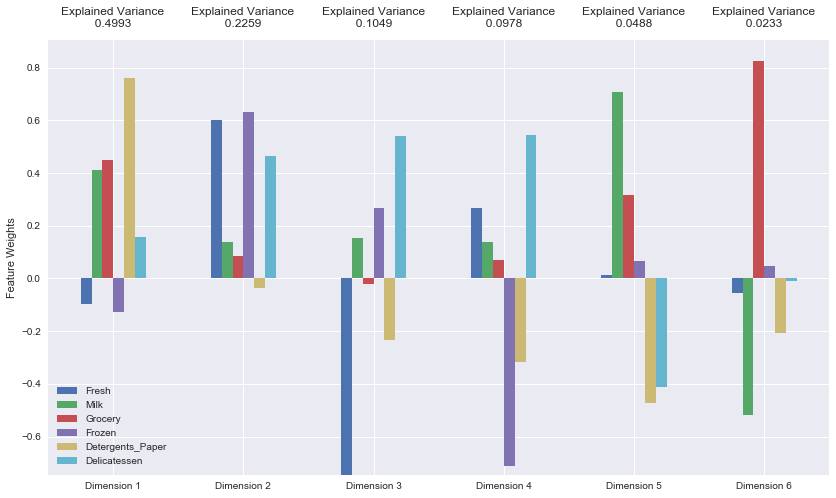

In [8]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)


# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [9]:
# TODO: Fit PCA to the good data using only two dimensions
pca = None
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data) 


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

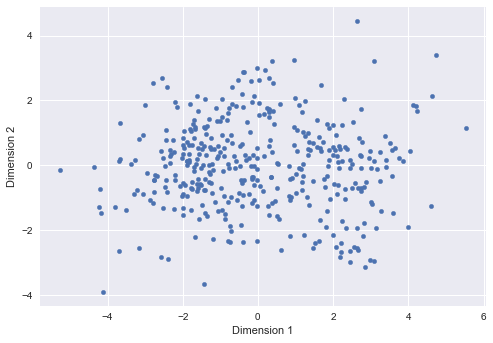

In [10]:
# Display the results of the clustering from implementation
reduced_data.plot(kind='scatter', x='Dimension 1', y='Dimension 2');

## Clustering

 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [11]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

for i in range(2,15):
    clusterer = mixture.GaussianMixture(n_components=i)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

   

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print("Clusters:%i silhouette_score:%f"%(i,score))

clusterer = mixture.GaussianMixture(n_components=2)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print("Highest -> Clusters:%i silhouette_score:%f"%(2,score))

Clusters:2 silhouette_score:0.447412
Clusters:3 silhouette_score:0.361194
Clusters:4 silhouette_score:0.306641
Clusters:5 silhouette_score:0.309933
Clusters:6 silhouette_score:0.343320
Clusters:7 silhouette_score:0.333266
Clusters:8 silhouette_score:0.323233
Clusters:9 silhouette_score:0.313156
Clusters:10 silhouette_score:0.329072
Clusters:11 silhouette_score:0.338319
Clusters:12 silhouette_score:0.287406
Clusters:13 silhouette_score:0.316420
Clusters:14 silhouette_score:0.324785
Highest -> Clusters:2 silhouette_score:0.447412


### How many clusters to use?
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** 
Above it was tried with 2 to 14 clusters. The best silhouette_score was achieved for 2 clusters, with a silhouette_score score of 0.443601. This would indicate that there are 2 clusters in this dataset.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

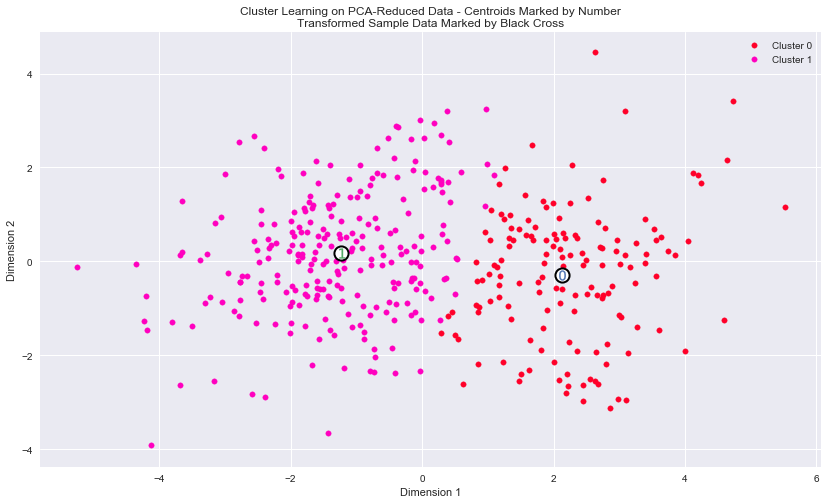

In [12]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [13]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print("True centers")
display(true_centers)
print("True centers - mean")
display(true_centers - data.mean().round())
print("True centers - median")
display(true_centers - data.median().round())

True centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0
Segment 1,9468.0,2067.0,2624.0,2196.0,343.0,799.0


True centers - mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-6826.0,1980.0,3630.0,-2004.0,1655.0,-424.0
Segment 1,-2532.0,-3729.0,-5327.0,-876.0,-2538.0,-726.0


True centers - median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3330.0,4149.0,6825.0,-458.0,3720.0,135.0
Segment 1,964.0,-1560.0,-2132.0,670.0,-473.0,-167.0


### Domain consideration
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Compared to the median mean of the dataset we can see that customers in segment 0 purchase relatively  less fresh food and milk, but more grocery, frozen and paper. Indicating that it represents an establishments that store and sell food on demand, also considering it sells alot of paper and not much delicatessen, which fast food establishments does not sell much of.

A customer in segment 1 buy alot in all product ranges, except frozen compared to the mean and median for the customers. This indicates that this is an establishment that deals with several kind of products and sounds more like retail/grocery stores.


## Conclusion

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

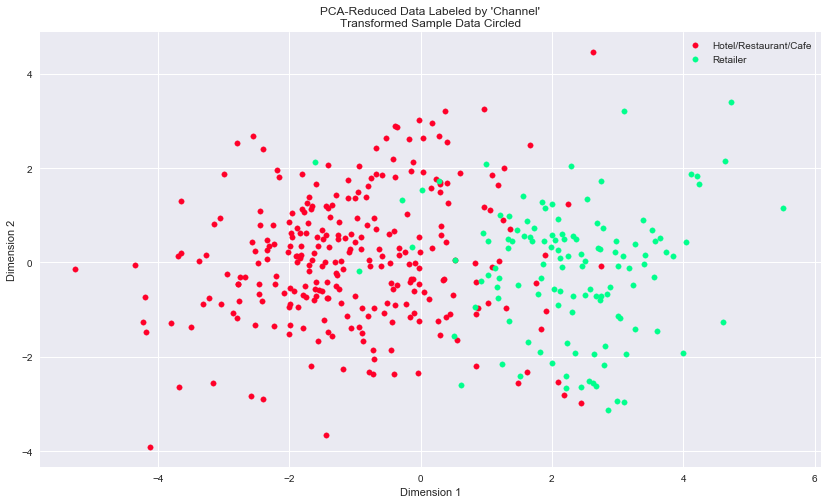

In [17]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers)

### Evaluate clustering
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The two distributions horeca and retail fit very well with the two clusters found by unsupervised ml methods (shown below). Also silouette scoring correctly identified the two clusters represented above by channels. It looks like I actually did predict to some degree of correctness the retail aspect as the retail channel overlaps very weel with the retail cluster. Also the horeca channel looks to overlap almost completely with my cafe/restaurant cluster. We see in reality that there is a bit more variance than predicted by GMM, meaning that the channels overlap on each other to some degree.

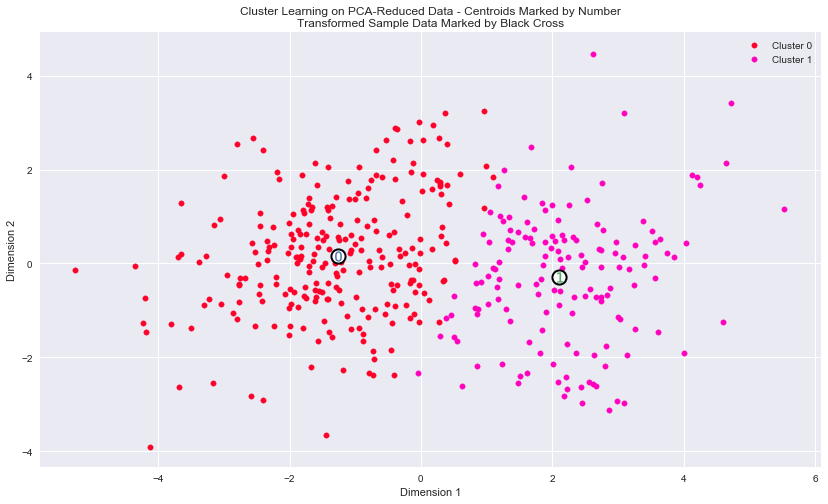

In [18]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers)

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score
all_data = pd.read_csv("customers.csv")
channel=all_data["Channel"]
all_data.drop(['Region', 'Channel'], axis = 1, inplace = True)

log_data = np.log(all_data.copy())
reduced_data = pca.transform(log_data) 
predsall = clusterer.predict(reduced_data)

y_pred = predsall
y_true = channel.values-1
y_t=np.array([i%2 for i in y_true])
print 'Accuracy: {:.3}%'.format(accuracy_score(y_t, y_pred))



Accuracy: 0.889%


# SUCCESS

In [ ]:
## 